# Проект для интернет магазина. Анализ результатов А/В теста эффективности изменений, внесённых в маркетинговую кампанию.

**Цель исследования:**

Оценить эффективность изменений, внесённых в маркетинговую кампанию, и определить, какая из двух кампаний (контрольная или тестовая) более успешна по ключевым бизнес-метрикам.

**Ход исследования:**

1. [Выгрузим данные и изучим их.](#1)
2. [Проведем предобработку:](#2)
- [Изменим названия столбцов согласно принятому стилю;](#2.1)
- [Выведем общую информацию о таблице;](#2.2)
- [Исследуем содержание столбцов на соответствие типов данных и изменим тип, где необходимо;](#2.3)
- [Изучим пропуски значений, примем решение оставить, удалить либо заменить на подходящее значение;](#2.4)
- [Проверим на наличие явных дубликатов и удалим их при наличии;](#2.5)
- [Заменим названия групп на более удобные;](#2.6)
3. [Проведем исследовательский анализ данных:](#3)
- [Изучим содержание колонок, проверим наличие выбросов или аномальных значений;](#3.1)
- [Посчитаем затраты на рекламу в двух группах;](#3.2)
- [Посчитаем показатель CAC стоимость привлечения одного клиента;](#3.3)
- [Посчитаем показатель CTR коэффициент кликабельности;](#3.4)
- [Строим нормализованные гистограммы по каждому параметру для двух групп;](#3.5)
- [Сформируем воронки конверсий пользователей на сайте.](#3.6)
4. [Проведем статистическое исследование.](#4)
5. [Выводы.](#5)

**Описание данных:**

 Исследование проводится на открытых данных, опубликованных на платформе для соревнований по анализу данных Kaggle под названием A/B Testing DataSet. Имеется две таблицы control_group.csv и test_group.csv, где собраны данные рекламного сервиса по поведению контрольной группы клиентов А (без изменений) и тестовой группы В (с изменениями).

- Campaign Name: Название кампании;
- Date: Дата записи;
- Spend: Сумма, потраченная на кампанию в долларах;
- of Impressions: Количество показов рекламы в рамках кампании;
- Reach: Количество уникальных показов, полученных по объявлению;
- of Website Clicks: Количество кликов на веб-сайт, полученных по объявлениям;
- of Searches: Количество пользователей, которые выполняли поиск на веб-сайте;
- of View Content: Количество пользователей, которые просматривали контент и товары на веб-сайте;
- of Add to Cart: Количество пользователей, которые добавили товары в корзине;
- of Purchase: Количество покупок. как можно сделать тестирование на этих данных

## 1. Выгрузим данные и изучим их.
<a name="1"></a>

In [ ]:
# импортируем библиотеки
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import numpy as np
from scipy import stats as st
import math as mth

In [ ]:
# Установка стиля
sns.set(style="whitegrid")

# Установка палет
sns.set(palette="Dark2")

In [ ]:
 # выгрузим нанные контрольной группы
 control = pd.read_csv('control_group.csv', sep=";")

In [ ]:
# распечатаем первые 10 строк
control.head(10)

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Control Campaign,6.08.2019,3083,109076.0,87998.0,4028.0,1709.0,1249.0,784.0,764.0
6,Control Campaign,7.08.2019,2544,142123.0,127852.0,2640.0,1388.0,1106.0,1166.0,499.0
7,Control Campaign,8.08.2019,1900,90939.0,65217.0,7260.0,3047.0,2746.0,930.0,462.0
8,Control Campaign,9.08.2019,2813,121332.0,94896.0,6198.0,2487.0,2179.0,645.0,501.0
9,Control Campaign,10.08.2019,2149,117624.0,91257.0,2277.0,2475.0,1984.0,1629.0,734.0


In [ ]:
# выгрузим нанные тестовой группы
test = pd.read_csv('test_group.csv', sep=";")

In [ ]:
# распечатаем первые 10 строк
test.head(10)

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2.08.2019,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,3.08.2019,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,4.08.2019,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,5.08.2019,2297,114295,95138,5863,2106,858,956,768
5,Test Campaign,6.08.2019,2458,42684,31489,7488,1854,1073,882,488
6,Test Campaign,7.08.2019,2838,53986,42148,4221,2733,2182,1301,890
7,Test Campaign,8.08.2019,2916,33669,20149,7184,2867,2194,1240,431
8,Test Campaign,9.08.2019,2652,45511,31598,8259,2899,2761,1200,845
9,Test Campaign,10.08.2019,2790,95054,79632,8125,2312,1804,424,275


In [ ]:
# объединим две таблицы для удобства дальнейшей работы
df = pd.concat([control, test], ignore_index=True)

In [ ]:
# выведем 10 случайных строк
df.sample(10)

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
58,Test Campaign,29.08.2019,2805,67444.0,43219.0,7651.0,1920.0,1240.0,1168.0,677.0
55,Test Campaign,26.08.2019,2311,80841.0,61589.0,3820.0,2037.0,1046.0,346.0,284.0
47,Test Campaign,18.08.2019,1979,53632.0,43241.0,6909.0,2824.0,2522.0,461.0,257.0
32,Test Campaign,3.08.2019,2365,70263.0,45198.0,7885.0,2572.0,2367.0,1268.0,578.0
13,Control Campaign,14.08.2019,1875,145248.0,118632.0,4521.0,1209.0,1149.0,1339.0,788.0
59,Test Campaign,30.08.2019,1977,120203.0,89380.0,4399.0,2978.0,1625.0,1034.0,572.0
12,Control Campaign,13.08.2019,2697,82847.0,68214.0,6554.0,2390.0,1975.0,1794.0,766.0
15,Control Campaign,16.08.2019,2024,71274.0,42859.0,5224.0,2427.0,2158.0,1613.0,438.0
21,Control Campaign,22.08.2019,2939,105705.0,86218.0,6843.0,3102.0,2988.0,819.0,387.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0


*Выгрузили данные и распечатали часть таблицы. Для удобства объединили две таблицы в один датафрейм. Мы видим, что не все названия столбцов указаны в едином стиле. Имеются пропуски значений.*

## 2. Проведем предобработку.
<a name="2"></a>

**Изменим названия столбцов согласно принятому стилю.**
<a name="2.1"></a>

In [ ]:
df.columns = ['group', 'date', 'spend', 'impressions', 'reach', 'clicks','searches', 'view_content', 'cart', 'purchase']


In [ ]:
df.head()

,group,date,spend,impressions,reach,clicks,searches,view_content,cart,purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Выведем общую информацию о таблице.**
<a name="2.2"></a>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   group         60 non-null     object 
 1   date          60 non-null     object 
 2   spend         60 non-null     int64  
 3   impressions   59 non-null     float64
 4   reach         59 non-null     float64
 5   clicks        59 non-null     float64
 6   searches      59 non-null     float64
 7   view_content  59 non-null     float64
 8   cart          59 non-null     float64
 9   purchase      59 non-null     float64
dtypes: float64(7), int64(1), object(2)
memory usage: 4.8+ KB


*Всего в таблице по двуг группам тестирования получили 60 строк, то есть собраны данные за 30 дней наблюдений. Есть данные числовые и категориальные. Видим несоответствие в типах данных.*

**Исследуем содержание столбцов на соответствие типов данных и изменим тип, где необходимо.**
<a name="2.3"></a>

In [ ]:
# преобразуем формат даты в соответствующий тип
df['date'] = pd.to_datetime(df['date'], format="%d.%m.%Y")

**Изучим пропуски значений, примем решение оставить, удалить либо заменить на подходящее значение.**
<a name="2.4"></a>

In [ ]:
# посчитаем количество строк с пропусками в каждом столбце
df.isna().sum()

,0
group,0
date,0
spend,0
impressions,1
reach,1
clicks,1
searches,1
view_content,1
cart,1
purchase,1


In [ ]:
# выведем строку с пропусками
missing_row = df[df.isnull().any(axis=1)]
missing_row

,group,date,spend,impressions,reach,clicks,searches,view_content,cart,purchase
4,Control Campaign,2019-08-05,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


*Мы видим, что 5 августа 2019 года в контрольной группе данные о поведении пользователей не записались, удалим эту строку, потому что, достоверными значениями заменить невозможно. Так как мы проводим анализ А/В теста, удалим строку с данными за этот же день тестовой группы, чтобы сохранить равенство выборок.*

In [ ]:
# удалим строки с данными от 2019-08-05

df = df[df['date'] != '2019-08-05']


In [ ]:
# после удаления строки с пропусками можем заменить типы данных в остальных числовых колонках на целочисленный
df = df.apply(lambda x: x.astype(int) if x.dtype == 'float' else x)

**Проверим на наличие явных дубликатов и удалим их при наличии.**
<a name="2.5"></a>

In [ ]:
df.duplicated().sum()

np.int64(0)

*Дубликатов в таблице не обнаружено.*

**Заменим названия групп на более удобные.**
<a name="2.6"></a>

In [ ]:
df['group'] = df['group'].map({'Control Campaign': 'A', 'Test Campaign': 'B'})
df.sample(10)

,group,date,spend,impressions,reach,clicks,searches,view_content,cart,purchase
49,B,2019-08-20,2712,39470,31893,6050,2061,1894,1047,730
7,A,2019-08-08,1900,90939,65217,7260,3047,2746,930,462
8,A,2019-08-09,2813,121332,94896,6198,2487,2179,645,501
18,A,2019-08-19,2596,107890,81268,3706,2483,2098,908,542
3,A,2019-08-04,1940,72878,61235,3065,1042,982,1183,340
2,A,2019-08-03,2343,131711,110862,6508,1737,1549,1134,372
29,A,2019-08-30,2324,111306,88632,4658,1615,1249,442,670
19,A,2019-08-20,2675,113430,78625,2578,1001,848,1709,299
28,A,2019-08-29,2375,92029,74192,8127,4891,4219,1486,334
26,A,2019-08-27,2061,104678,91579,4941,3549,3249,980,605


*Выполнили предобработку данных. Изменили названия колонок в таблице, удалили пропуски и выровняли размеры групп тестирования. Также изменили типы данных и привели названия групп к простому виду.*

## 3. Проведем исследовательский анализ данных.
<a name="3"></a>

**Изучим содержание колонок, проверим наличие выбросов или аномальных значений.**
<a name="3.1"></a>

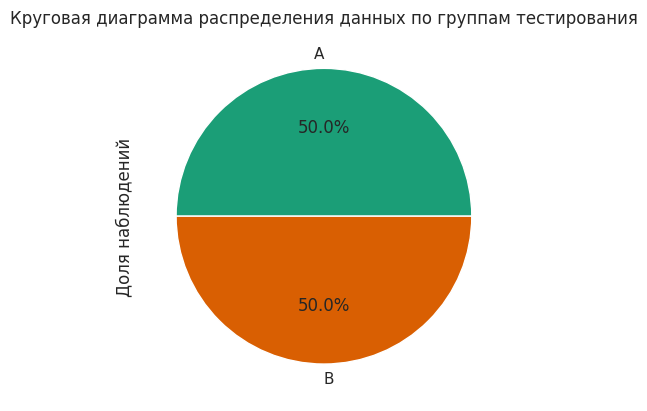

In [ ]:
#изучим равномерность распределения по группам
df_group = df.groupby('group')['date'].count().reset_index()
df_group
df_group['date'].plot.pie(labels=df_group['group'], autopct='%1.1f%%')
plt.title('Круговая диаграмма распределения данных по группам тестирования')
plt.ylabel('Доля наблюдений')
plt.show()

*Данные по дням распределены равномерно.*

In [ ]:
# выясним даты тестирования
df.agg({'date': ['min', 'max']})



,date
min,2019-08-01
max,2019-08-30


*Исследование проводилось с 1 по 30 августа.*

Для исследования поведения пользователей в каждой группе создадим два отдельных датафрейма.

In [ ]:
df_group_A = df.query("group == 'A'")

df_group_B = df.query("group == 'B'")

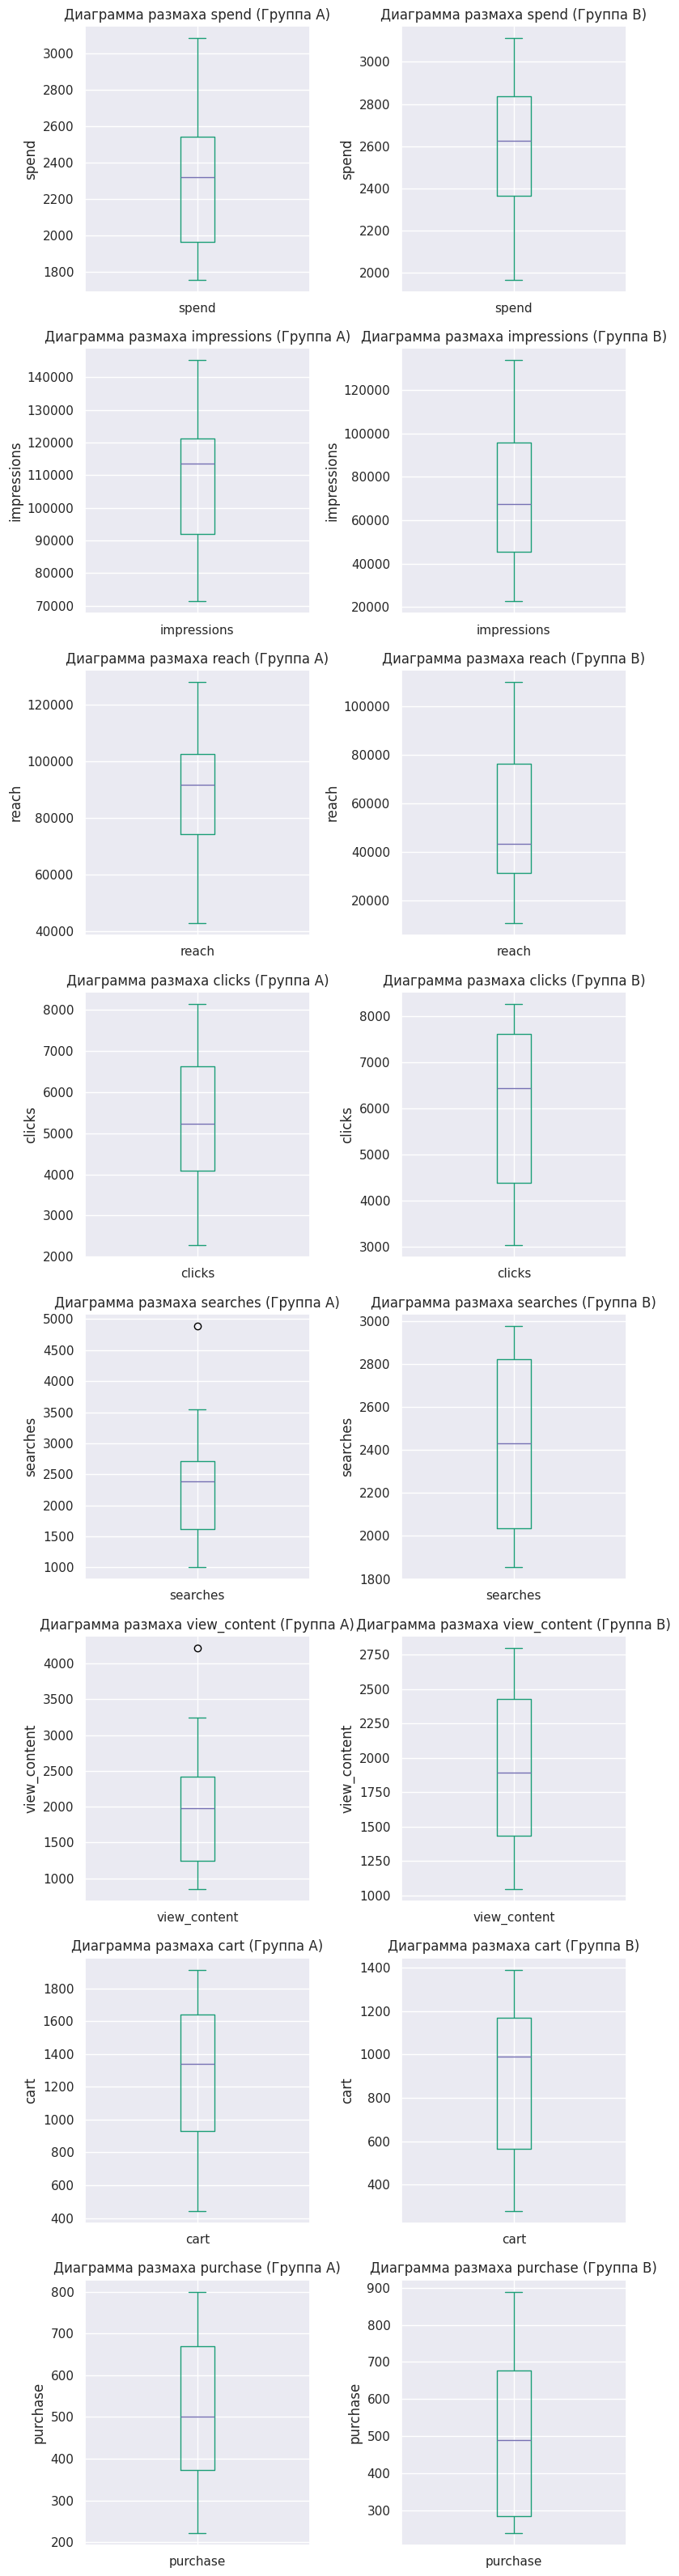

In [ ]:
# нарисуем распределение для данных о поведении пользователей и затратах на рекламу
columns = ['spend', 'impressions', 'reach', 'clicks', 'searches', 'view_content', 'cart', 'purchase']

fig, axes = plt.subplots(len(columns), 2, figsize=(8, len(columns) * 4))  # 2 столбца: группа A и B

for i, col in enumerate(columns):
    df_group_A[col].plot.box(ax=axes[i, 0])
    axes[i, 0].set_title(f'Диаграмма размаха {col} (Группа A)')
    axes[i, 0].set_ylabel(col)

    df_group_B[col].plot.box(ax=axes[i, 1])
    axes[i, 1].set_title(f'Диаграмма размаха {col} (Группа B)')
    axes[i, 1].set_ylabel(col)

plt.tight_layout()
plt.show()

*Мы видим выбросы в данных группы А по количеству пользователей, которые выполняли поиск на веб-сайте и количеству пользователей, которые просматривали контент и товары на веб-сайте.*

In [ ]:
df_group_A.query('searches> 4500')

,group,date,spend,impressions,reach,clicks,searches,view_content,cart,purchase
28,A,2019-08-29,2375,92029,74192,8127,4891,4219,1486,334


In [ ]:
df_group_A.query('view_content> 4000')

,group,date,spend,impressions,reach,clicks,searches,view_content,cart,purchase
28,A,2019-08-29,2375,92029,74192,8127,4891,4219,1486,334


Удалим данные за 29 августа 2019 года из таблицы, так как выбросы повлияют на результат тестирования.

In [ ]:
df = df[df['date'] != '2019-08-29']
# отсортируем полученный датафрейм
df = df.sort_values(by=["group", "date"])

In [ ]:
# размер итоговой таблицы
len(df)

56

*Изначально размер таблицы был 60 строк, после удалений получили 56.*

**Посчитаем затраты на рекламу в двух группах.**
<a name="3.2"></a>

In [ ]:
df_spend = df.groupby('group')['spend'].sum().reset_index()
df_spend['rate'] = round(df_spend['spend']/df['spend'].sum()*100,2)
df_spend

,group,spend,rate
0,A,64443,47.3
1,B,71790,52.7


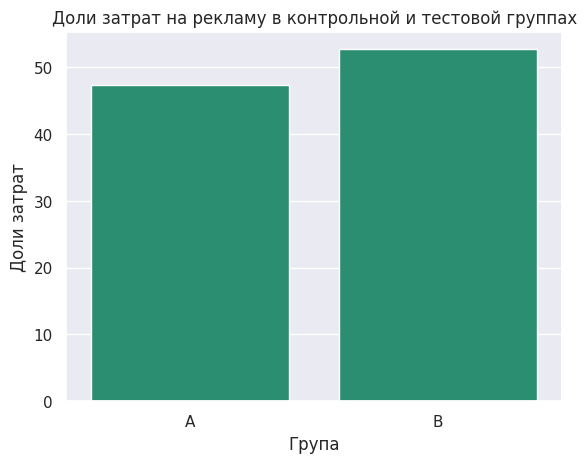

In [ ]:
sns.barplot(x='group', y='rate', data=df_spend,estimator=sum)
plt.title('Доли затрат на рекламу в контрольной и тестовой группах')
plt.ylabel('Доли затрат')
plt.xlabel('Група')
plt.show()


*В тестовой группе потратили на рекламу на 5,4% больше.*

**Посчитаем показатель CAC стоимость привлечения одного клиента.**
<a name="3.3"></a>

Для расчета показателя CAC (стоимости привлечения клиента) используем следующую формулу:

$$ \text{CAC} = \frac{\text{Общие расходы на маркетинг и продажи}}{\text{Количество новых клиентов}} $$



In [ ]:
df['cac'] = round(df['spend']/df['clicks'],2)

**Посчитаем показатель CTR коэффициент кликабельности.**
<a name="3.4"></a>

Для расчета показателя CTR  используем следующую формулу:

$$ \text{CTR} = \frac{\text{Количество кликов}}{\text{Количество показов}}*100 $$

In [ ]:
df['ctr'] = round(df['clicks']/df['impressions']*100,2)


**Строим нормализованные гистограммы по каждому параметру для двух групп.**
<a name="3.5"></a>

In [ ]:
df.head()

,group,date,spend,impressions,reach,clicks,searches,view_content,cart,purchase,cac,ctr
0,A,2019-08-01,2280,82702,56930,7016,2290,2159,1819,618,0.32,8.48
1,A,2019-08-02,1757,121040,102513,8110,2033,1841,1219,511,0.22,6.70
2,A,2019-08-03,2343,131711,110862,6508,1737,1549,1134,372,0.36,4.94
3,A,2019-08-04,1940,72878,61235,3065,1042,982,1183,340,0.63,4.21
5,A,2019-08-06,3083,109076,87998,4028,1709,1249,784,764,0.77,3.69


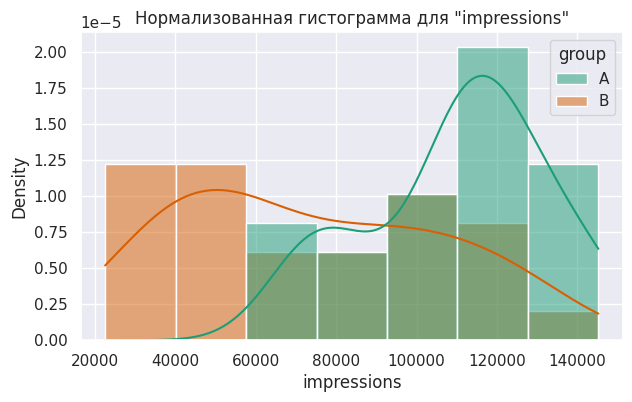

In [ ]:
#создадим функцию для построения однотипных гистограмм
def plot_normalized_histogram(data, column, hue='group', figsize=(7, 4)):

    fig, ax = plt.subplots(figsize=figsize)

    sns.histplot(
        data=df,
        x=column,
        hue=hue, # цветовая группировка по колонке group
        stat='density', # нормализация
        common_norm=False,
        kde=True,# отключение общей нормализации между группами
        ax=ax
    )

    ax.set_title(f'Нормализованная гистограмма для "{column}"')
    ax.set_xlabel(column)
    ax.set_ylabel('Density')

    plt.show()

#создадаим нормализованную гистограмму для значений impressions
plot_normalized_histogram(df, 'impressions')


*Из графика мы видим, что количество показов объявления в группе А чаще принимает значение 120000, а в группе В от 40000 до 60000.*

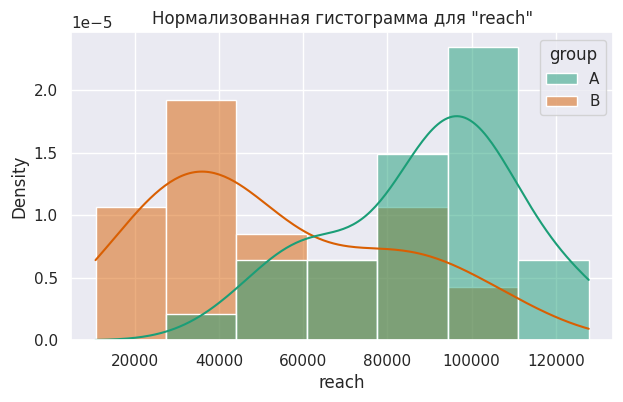

In [ ]:
#создадаим нормализованную гистограмму для значений reach
plot_normalized_histogram(df, 'reach')

*Из графика мы видим, что охват в группе А чаще принимает значение 100000-110000, а в группе В от 30000 до 40000.*

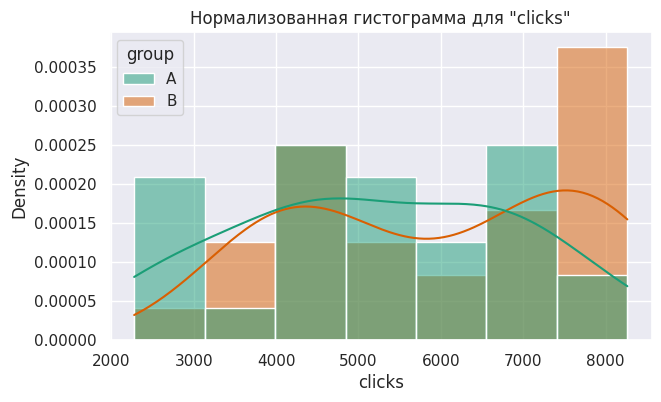

In [ ]:
# создадаим нормализованную гистограмму для значений clicks
plot_normalized_histogram(df, 'clicks')

*Из графика мы видим, что клики по объявлениям в группе А чаще принимает значение 5000, а в группе В 7000.*

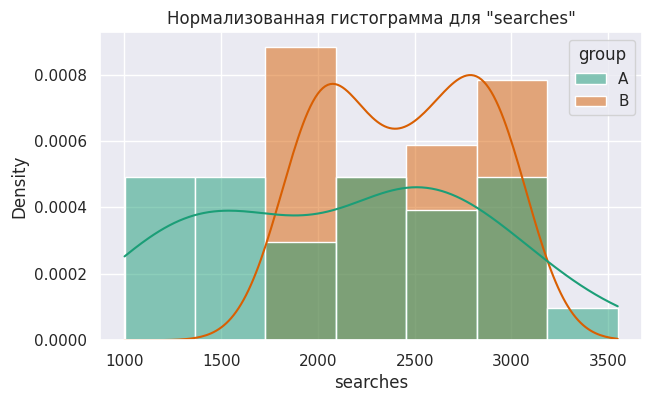

In [ ]:
# создадаим нормализованную гистограмму для значений searches
plot_normalized_histogram(df, 'searches')

*Из графика мы видим, что количество клиентов осуществили поиск на сайте в группе А чаще принимает значение 1500, а в группе В от 2000 до 3000.*

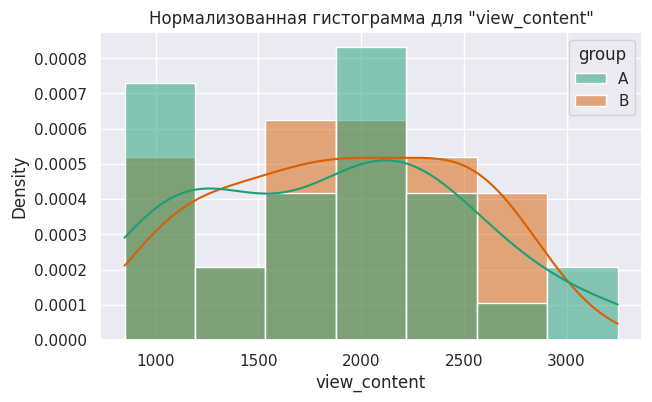

In [ ]:
# создадаим нормализованную гистограмму для значений view_content
plot_normalized_histogram(df, 'view_content')

*Из графика мы видим, что количество клиентов, просмотревших страницы сайта в группе А чаще принимает значение 2000, а в группе В от 1500 до 2000.*

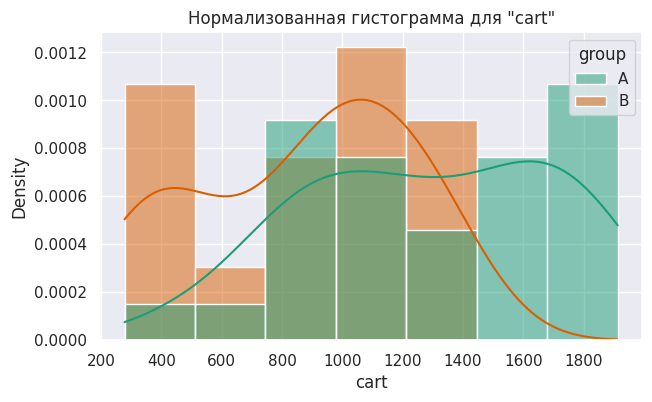

In [ ]:
# создадаим нормализованную гистограмму для значений cart
plot_normalized_histogram(df, 'cart')

*Из графика мы видим, что количество клиентов, добавили товар в корзину в группе А чаще принимает значение 1700, а в группе В от 1000 до 1200.*

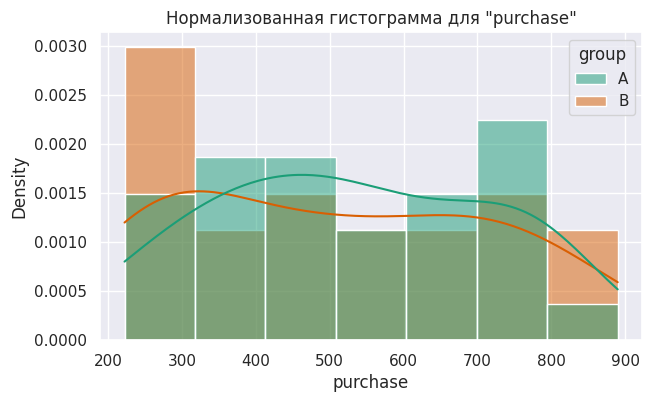

In [ ]:
# создадаим нормализованную гистограмму для значений purchase
plot_normalized_histogram(df, 'purchase')

*Из графика мы видим, что количество клиентов, оплатили покупку в группе А чаще принимает значение 700-800, а в группе В от 200 до 300.*

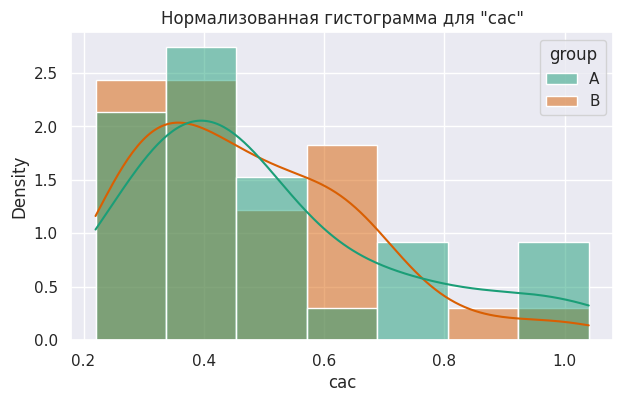

In [ ]:
# создадаим нормализованную гистограмму для значений cac
plot_normalized_histogram(df, 'cac')

*Стоимость привлечения клиентов в обеих группах имеет чаще всего значение 0,4.*

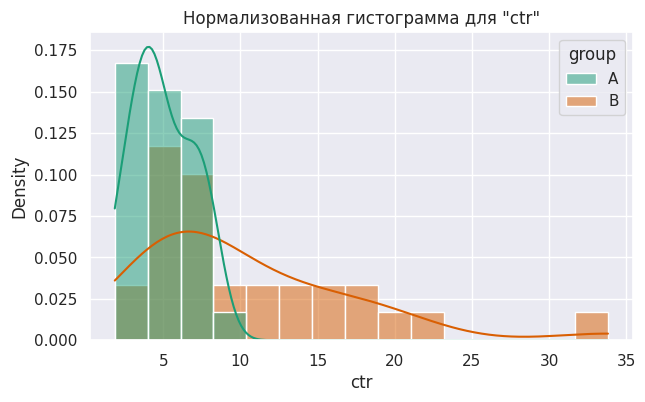

In [ ]:
# создадаим нормализованную гистограмму для значений ctr
plot_normalized_histogram(df, 'ctr')

*Кликабельность объявлений группы А принимает значение 5, тогда как этот показатель у группы В от 10-20.*

**Промежуточный вывод:**В ходе аналитического исследования поведения пользователей двух групп мы можем сделать вывод, что при увеличении рекламного бюджета на 5,4% для тестовой группы мы повысили показатель кликабельности объявлений, увеличили число пользователей в поиск и просмотр контента, но добавлений товара в корзину и покупок на сайте стало меньше.

**Сформируем воронки конверсий пользователей на сайте.**
<a name="3.6"></a>

In [ ]:
df_funnel = df.groupby('group')[['clicks', 'searches', 'view_content', 'cart', 'purchase']].sum().reset_index()
df_funnel

,group,clicks,searches,view_content,cart,purchase
0,A,146176,59527,52151,36214,14827
1,B,167456,68543,53642,24322,14192


In [ ]:

stages = ['clicks', 'searches', 'view_content', 'cart', 'purchase']

# создаем воронку
fig = go.Figure()

fig.add_trace(go.Funnel(
    name='Группа A',
    y=stages,
    x=df_funnel.loc[0,'clicks':'purchase']
))

fig.add_trace(go.Funnel(
    name='Группа B',
    y=stages,
    x=df_funnel.loc[1,'clicks':'purchase']
))

# Настройки графика
fig.update_layout(title="Воронка конверсий для двух групп")

# Показать график
fig.show()

**Промежуточный вывод:** для тестовой рекламной компании нам удалось увеличить число новых пользователей на сайте, но конверсия в следующие шаги на сайте сократилась.

## 4. Проведем статистическое исследование.
<a name="4"></a>

Для начала мы сформулируем гипотезы, затем примем решение,  какой тест мы будем использовать. Для этого мы проведем тест на нормальность нашего распределения. При нормальном распределении применем t-test, если распределение не нормально нам подойдет тест Манна-Уитни. Для пропорций используем z-test.

Сформулируем гипотезы:

H0 - Нет различий в стоимости привлечения клиентов для двух групп тестирования

H1 - Есть различия в стоимости привлечения клиентов для двух групп тестирования

In [ ]:
#проверим распределение cac на нормальность, применим  критерий Шапиро-Уилка
data_shapiro = df['cac']

alpha = 0.05  # критический уровень статистической значимости

results = st.shapiro(data_shapiro) #выбираем 1000 значений из выборки
p_value = results[1]  # второе значение в массиве результатов (с индексом 1) - p-value

print(f'p-значение: {p_value:.10e}')

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально')

p-значение: 2.5815417219e-04
Отвергаем нулевую гипотезу: распределение не нормально


In [ ]:
#выделим датасеты с клиентами группы А и В
df_A = df.query("group == 'A' ")['cac']
df_B = df.query("group == 'B' ")['cac']


results = st.mannwhitneyu(df_A, df_B, alternative='two-sided')


print(f'p-значение: {results.pvalue:.5f}')


if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: Есть различия в стоимости привлечения клиентов для двух групп тестирования')
else:
    print('Не получилось отвергнуть нулевую гипотезу: Нет различий в стоимости привлечения клиентов для двух групп тестирования')


p-значение: 0.84397
Не получилось отвергнуть нулевую гипотезу: Нет различий в стоимости привлечения клиентов для двух групп тестирования


Сформулируем гипотезы:

H0 - Нет различий в кликабельности объявлений для двух групп тестирования

H1 - Есть различия в кликабельности объявлений для двух групп тестирования

In [ ]:
#проверим распределение ctr на нормальность, применим  критерий Шапиро-Уилка
data_shapiro = df['ctr']

alpha = 0.05  # критический уровень статистической значимости

results = st.shapiro(data_shapiro) #выбираем 1000 значений из выборки
p_value = results[1]  # второе значение в массиве результатов (с индексом 1) - p-value

print(f'p-значение: {p_value:.10e}')

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально')

p-значение: 3.7696525346e-08
Отвергаем нулевую гипотезу: распределение не нормально


In [ ]:
#выделим датасеты с клиентами группы А и В
df_A = df.query("group == 'A' ")['ctr']
df_B = df.query("group == 'B' ")['ctr']


results = st.mannwhitneyu(df_A, df_B, alternative='two-sided')


print(f'p-значение: {results.pvalue:.5f}')


if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: Есть различия в кликабельности объявлений для двух групп тестирования')
else:
    print('Не получилось отвергнуть нулевую гипотезу: Нет различий в кликабельности объявлений для двух групп тестирования')

p-значение: 0.00019
Отвергаем нулевую гипотезу: Есть различия в кликабельности объявлений для двух групп тестирования


Для тестирования воронки нам нудно провести 4 теста на одних и тех же данных, поэтому сделаем поправку уровня значимости по методу Шидака, чтобы не повысить коэффициент ошибок статистического теста.

In [ ]:
#посчитаем поправку уровня значимости по методу Шидака
alpha_shidak = 1- (1-alpha)**(1/4)
print("alpha_shidak:", alpha_shidak)


alpha_shidak: 0.012741455098566168


Сформулируем гипотезы:

H0 - Нет различий в конверсии в поиск на сайте для двух групп тестирования

H1 - Есть различия в конверсии в поиск на сайте для двух групп тестирования

In [ ]:
# данные по воронке конверсий
df_funnel

,group,clicks,searches,view_content,cart,purchase
0,A,146176,59527,52151,36214,14827
1,B,167456,68543,53642,24322,14192


In [ ]:
# применем z-тест для пропорций
alpha = 0.01  # откорректированный уровень статистической значимости

purchases = np.array([59527, 68543])
leads = np.array([146176, 167456])

p1 = purchases[0]/leads[0]
p2 = purchases[1]/leads[1]

p_combined = (purchases[0] +purchases[1]) / (leads[0] + leads[1])

difference = p1 - p2

z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/leads[0] + 1/leads[1]))

distr = st.norm(0, 1)

p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными')

p-значение:  0.23460985393070155
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


Сформулируем гипотезы:

H0 - Нет различий в конверсии в просмотр контента для двух групп тестирования

H1 - Есть различия в конверсии в просмотр контента для двух групп тестирования


In [ ]:
# применем z-тест для пропорций

purchases = np.array([52151, 53642])
leads = np.array([146176, 167456])

p1 = purchases[0]/leads[0]
p2 = purchases[1]/leads[1]

p_combined = (purchases[0] +purchases[1]) / (leads[0] + leads[1])

difference = p1 - p2

z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/leads[0] + 1/leads[1]))

distr = st.norm(0, 1)

p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными')

p-значение:  0.0
Отвергаем нулевую гипотезу: между долями есть значимая разница


Сформулируем гипотезы:

H0 - Нет различий в конверсии в добавление в корзину товара для двух групп тестирования

H1 - Есть различия в конверсии в добавление в корзину товара для двух групп тестирования

In [ ]:
# применем z-тест для пропорций

purchases = np.array([36214, 24322])
leads = np.array([146176, 167456])

p1 = purchases[0]/leads[0]
p2 = purchases[1]/leads[1]

p_combined = (purchases[0] +purchases[1]) / (leads[0] + leads[1])

difference = p1 - p2

z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/leads[0] + 1/leads[1]))

distr = st.norm(0, 1)

p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными')

p-значение:  0.0
Отвергаем нулевую гипотезу: между долями есть значимая разница


Сформулируем гипотезы:

H0 - Нет различий в конверсии в покупку товара для двух групп тестирования

H1 - Есть различия в конверсии в покупку товара для двух групп тестирования

In [ ]:
# применем z-тест для пропорций

purchases = np.array([14827, 14192])
leads = np.array([146176, 167456])

p1 = purchases[0]/leads[0]
p2 = purchases[1]/leads[1]

p_combined = (purchases[0] +purchases[1]) / (leads[0] + leads[1])

difference = p1 - p2

z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/leads[0] + 1/leads[1]))

distr = st.norm(0, 1)

p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными')

p-значение:  0.0
Отвергаем нулевую гипотезу: между долями есть значимая разница


**Промежуточный вывод:** мы сформулировали гипотезы и провели несколько А/В тестов для важных бизнес метрик. Получили такой результат- Не получилось отвергнуть нулевую гипотезу: Нет различий в стоимости привлечения клиентов для двух групп тестирования. Отвергаем нулевую гипотезу: Есть различия в кликабельности объявлений для двух групп тестирования. При тестировании показателей конверсий, мы выявили статистически значимые различия между двух груп тестирования в просмотр контента, добавление в корзину и покупку товара на сайте.

## 5. Выводы:
<a name="5"></a>

У нас было две таблицы с данными по тестовой и контрольной группам клиентов интерент магазина за 30 дней августа 2019. Имелась информация о затратах на рекламу и поведением пришедших по ней пользователей на сайте.
  
  Для начала мы выгрузили и изучили данные. Провели предобработку и сделали аналитическое исследование. Мы посчитали такие показатели как CAC(стоимость привлечения одного клиента), CTR(показатель кликабельности объявлений) и сформировали воронку конверсий поведения пользователей на сайте. Затем провели серию статистических тестов для поиска статистически значимых отличий в наших группах.

**Основные выводы по эффективности изменений в рекламной кампании:**
-
Рост затрат без оптимизации:

На новую кампанию (группа B) было затрачено на 5.4% больше средств, но это не привело к снижению стоимости привлечения клиентов (CAC).
Статистический тест не позволил отвергнуть нулевую гипотезу → различий в CAC между группами нет.
- Снижение охвата, но рост кликабельности:

Охват новых пользователей сократился с 100 000 до 40 000 в тестовой группе.
Однако CTR (кликабельность объявлений) увеличился, что подтверждается результатами A/B-теста (нулевая гипотеза отвергнута → разница между группами статистически значима).

*Важно:* с точки зрения расширения узнаваемости бренда такая политика неэффективна.
- Конверсия снизилась:

Количество новых посетителей увеличилось на 6.8% в тестовой группе.
Конверсия в покупку снизилась на 0.5%, и эта разница статистически значима.

Мы также выявили значимые различия в показателях просмотра контента, добавления в корзину и покупки товара между группами.

**Вывод:**
Данные по группе B показали худшие результаты по сравнению с контрольной группой.

Текущие настройки рекламной кампании нецелесообразно применять на всех пользователях сайта, так как они не приводят к росту ключевых бизнес-показателей.

**Рекомендации:**

Пересмотреть стратегию таргетинга, чтобы увеличить охват без снижения конверсии.

Оценить качество трафика в тестовой группе: возможно, привлекаются менее заинтересованные пользователи.

Провести дополнительные тесты с изменением параметров аудитории, форматов объявлений и структуры посадочных страниц.   